<a href="https://colab.research.google.com/github/Mahesh527784/ASA_Solutions/blob/main/Mini_project_%5B5_12_2024%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
data1 = pd.read_csv('/content/dataset.csv')
data = pd.read_csv('/content/dataset.csv')

# **TASK 01: READING THE DATASET**

In [5]:
data1

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


# **TASK 02: CHECKING FOR MISSING VALUES & DUPLICATE ROWS**

In [7]:
# Check for missing values
mis_val = data1.isnull().sum()

# Check for duplicate rows
dup = data1.duplicated().sum()

mis_val
dup


0

# **TASK 03: PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES (SEASON/HOLIDAY/WEEKEND/WEATHER_CODE)**

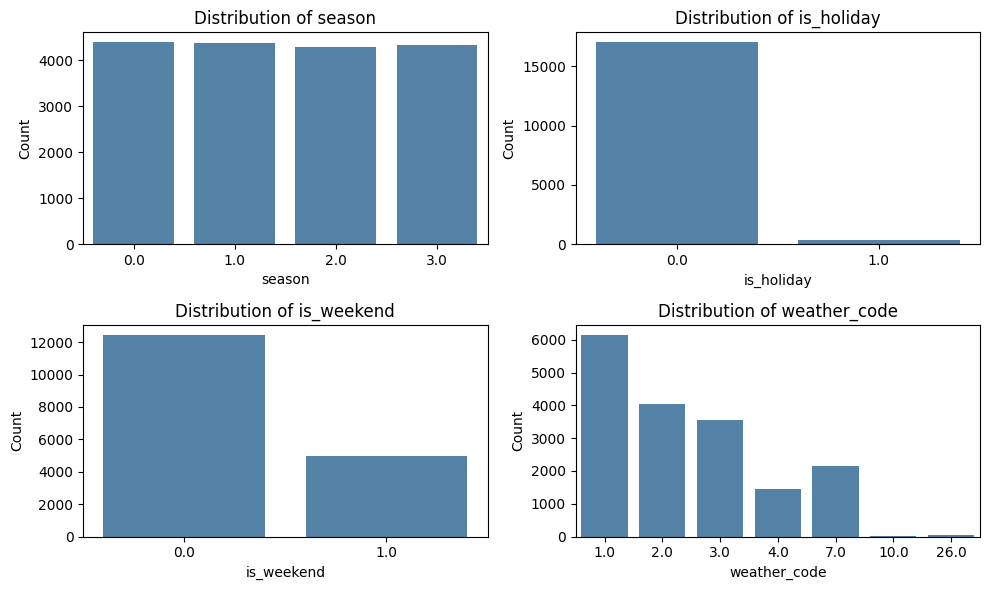

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of discrete features
discrete_features = ['season', 'is_holiday', 'is_weekend', 'weather_code']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axis = axes.flatten()

for i, feature in enumerate(discrete_features):
    sns.countplot(x=data[feature], ax=axis[i], color="steelblue")  # Using color instead of palette
    axis[i].set_title(f"Distribution of {feature}")
    axis[i].set_xlabel(feature)
    axis[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


# **TASK 04 - LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX**

In [11]:
# Step 1: Check the data types of each variable
print("Data Types of Each Variable:")
print(data.dtypes)

# Step 2: Convert the 'timestamp' column to datetime type if it's not already
if not pd.api.types.is_datetime64_any_dtype(data.index):  # Check if index is already datetime
    data.index = pd.to_datetime(data.index, unit='s')  # Convert to datetime if not
else:
    print("'timestamp' is already in datetime format.")

# Step 3: If 'timestamp' is not the index, set it as the index
if data.index.name != 'timestamp':  # Check if 'timestamp' is already the index
    # If timestamp is a regular column, set it as index
    if 'timestamp' in data.columns:
        data.set_index('timestamp', inplace=True)
    else:
        print("'timestamp' is not found as a column. It might be the index already or missing.")
else:
    print("'timestamp' is already set as the index.")

# Verify the changes
print("\nUpdated DataFrame with 'timestamp' as the index:")
print(data.head())


Data Types of Each Variable:
index             int64
timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

Updated DataFrame with 'timestamp' as the index:
                     index  cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                                    
2015-01-04 00:00:00      0  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00      1  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00      2  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00      3   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00      4   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                 

# **TASK 05 - MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.**

In [13]:
# prompt: Using dataframe data: MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

import pandas as pd

# Assuming 'data' is your pandas DataFrame

# Reset the index to access 'timestamp' as a column
data = data.reset_index()  # Resets the index, 'timestamp' becomes a column again

# Convert 'timestamp' to datetime if it's not already
data['timestamp'] = pd.to_datetime(data['timestamp']) # This line ensures the 'timestamp' column is in datetime format

# Extract year
data['year'] = data['timestamp'].dt.year

# Extract month
data['month'] = data['timestamp'].dt.month

# Extract day of the week (Monday=0, Sunday=6)
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Extract day of the month
data['day_of_month'] = data['timestamp'].dt.day

# Extract hour of the day
data['hour'] = data['timestamp'].dt.hour

# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn

# Apply the function to create the 'season_new' column
data['season_new'] = data['month'].apply(get_season)

# Set 'timestamp' back as the index if needed
data.set_index('timestamp', inplace=True)

# Display the updated DataFrame (optional)
print(data)

                     level_0  index   cnt   t1   t2    hum  wind_speed  \
timestamp                                                                
2015-01-04 00:00:00        0      0   182  3.0  2.0   93.0         6.0   
2015-01-04 01:00:00        1      1   138  3.0  2.5   93.0         5.0   
2015-01-04 02:00:00        2      2   134  2.5  2.5   96.5         0.0   
2015-01-04 03:00:00        3      3    72  2.0  2.0  100.0         0.0   
2015-01-04 04:00:00        4      4    47  2.0  0.0   93.0         6.5   
...                      ...    ...   ...  ...  ...    ...         ...   
2017-01-03 19:00:00    17409  17409  1042  5.0  1.0   81.0        19.0   
2017-01-03 20:00:00    17410  17410   541  5.0  1.0   81.0        21.0   
2017-01-03 21:00:00    17411  17411   337  5.5  1.5   78.5        24.0   
2017-01-03 22:00:00    17412  17412   224  5.5  1.5   76.0        23.0   
2017-01-03 23:00:00    17413  17413   139  5.0  1.0   76.0        22.0   

                     weather_code  is

# **TASK 06 - VISUALIZING THE CORRELATION WITH A HEATMAP**

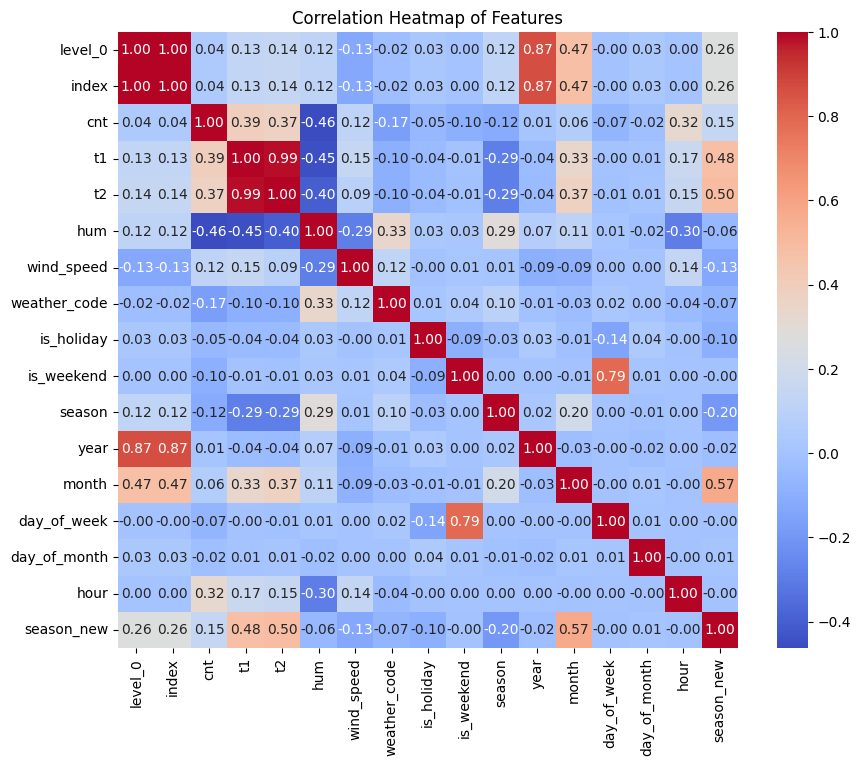

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()


# **TASK 07 - VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO**

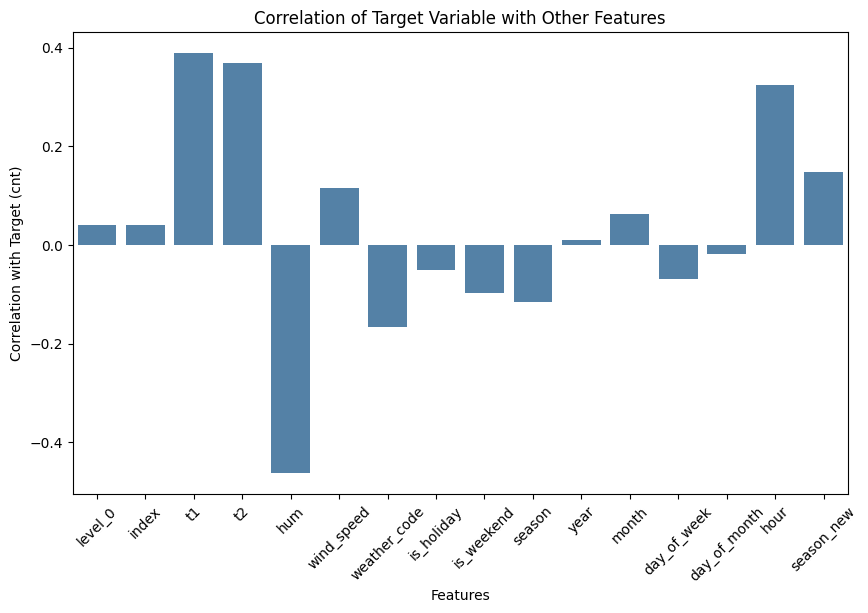

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation of the target variable 'cnt' with all other features
correlation_with_target = data.corr()['cnt'].drop('cnt')  # Drop 'cnt' from the result

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, color="steelblue")
plt.title("Correlation of Target Variable with Other Features")
plt.xlabel("Features")
plt.ylabel("Correlation with Target (cnt)")
plt.xticks(rotation=45)
plt.show()


# **TASK 08 - PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT**

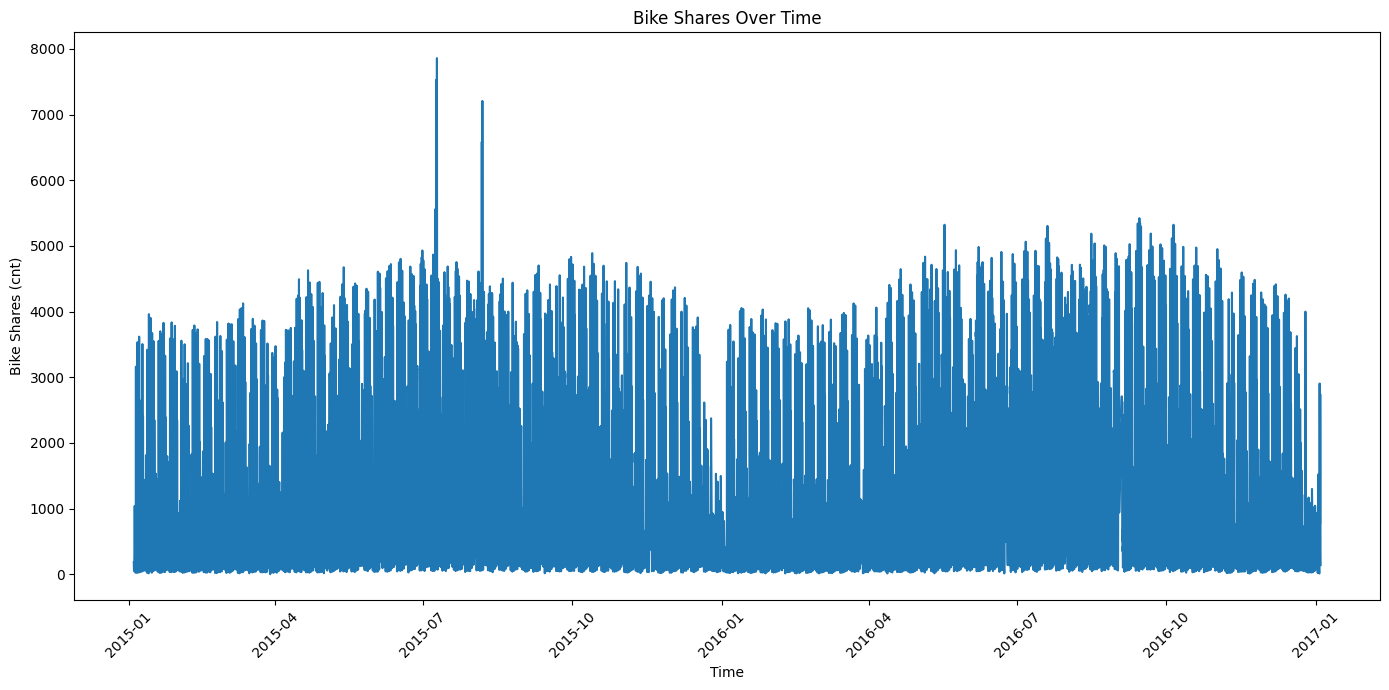

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bike shares over time using a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=data.index, y=data['cnt'], color="tab:blue")
plt.title("Bike Shares Over Time")
plt.xlabel("Time")
plt.ylabel("Bike Shares (cnt)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **TASK 09 - PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)**

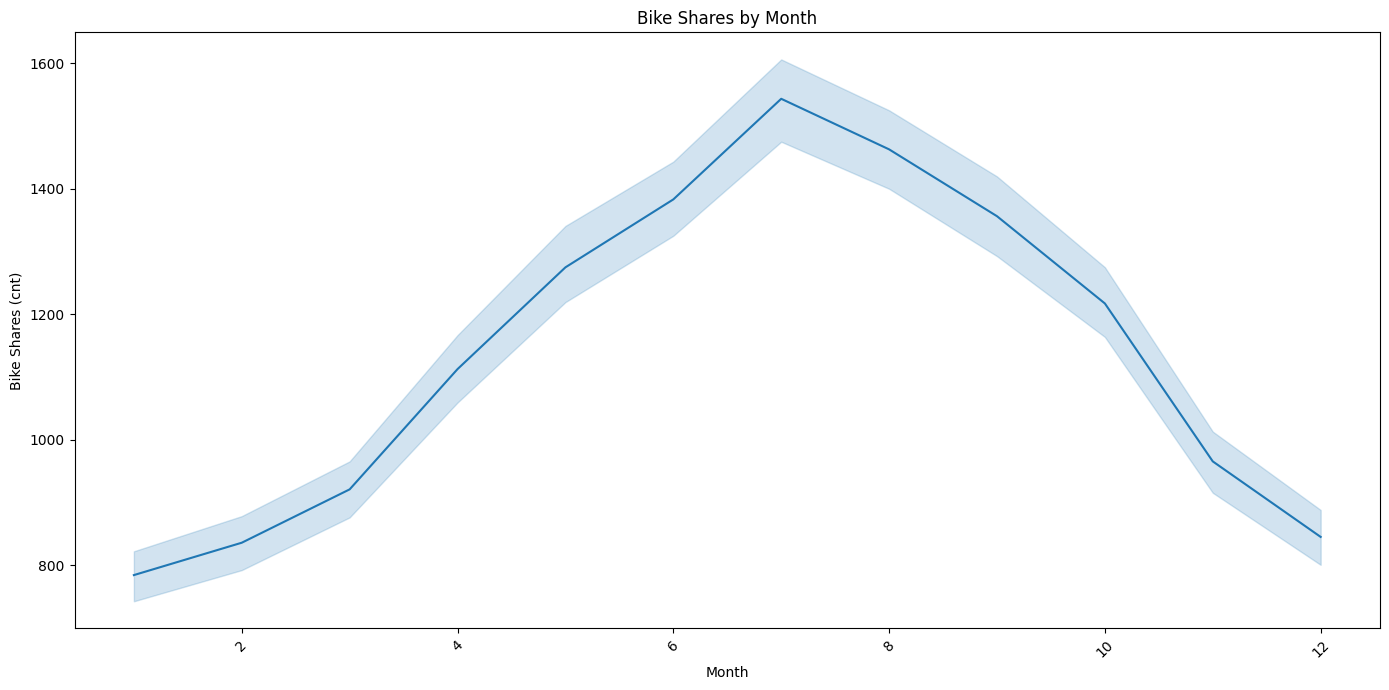

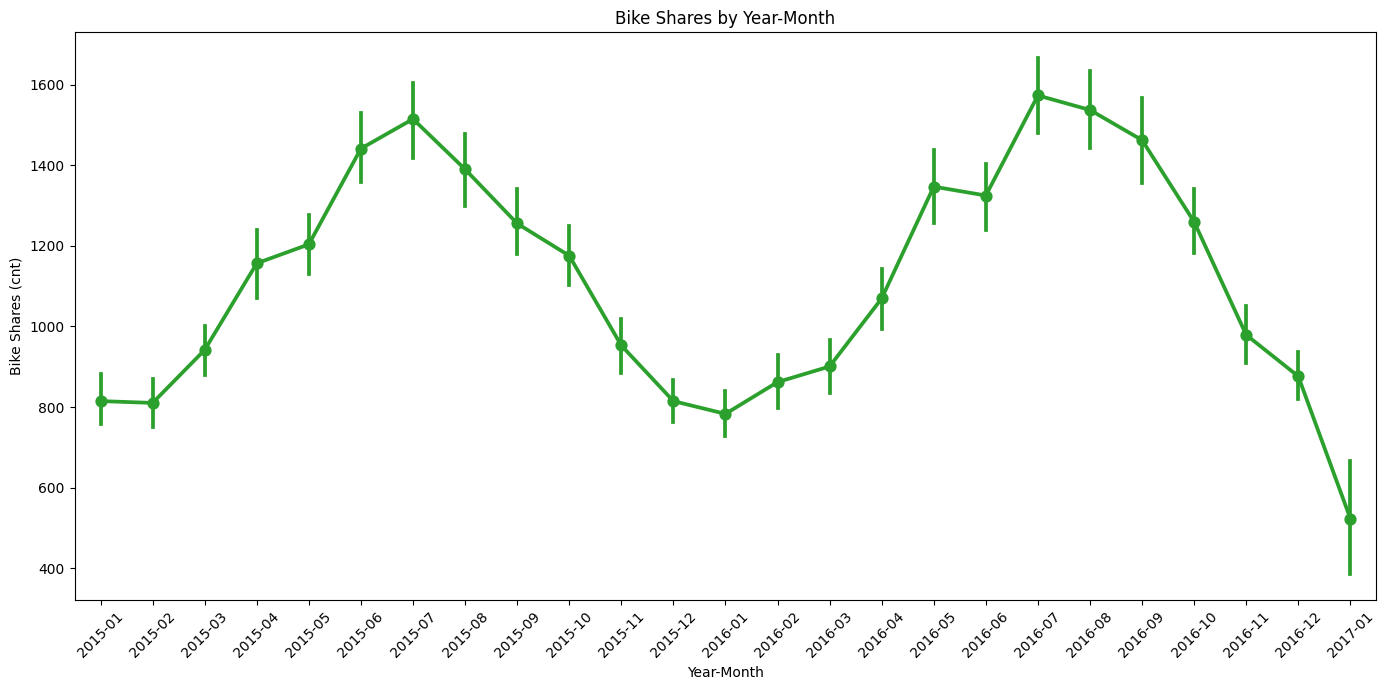

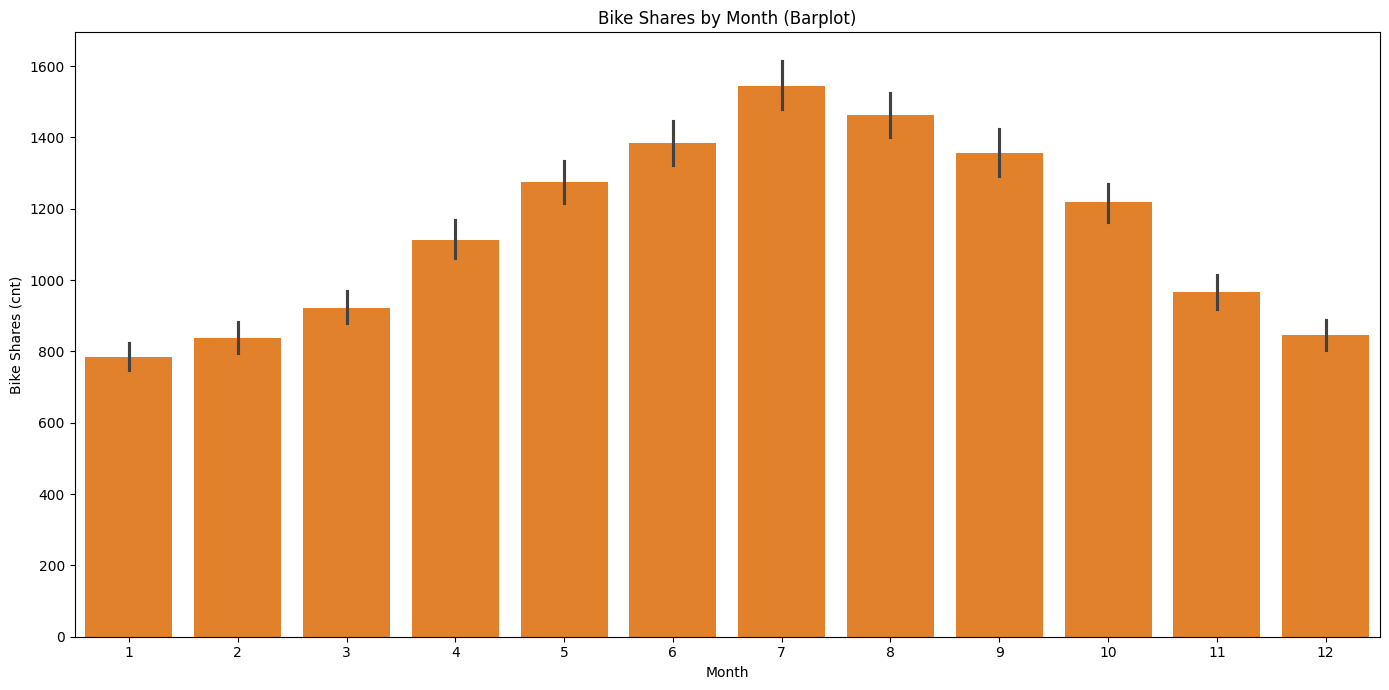

In [ ]:
# Extract year-month for better visualization
data['year_month'] = data.index.to_period('M')

# Plot bike shares by month using Lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['month'], y=data['cnt'], color="tab:blue")
plt.title("Bike Shares by Month")
plt.xlabel("Month")
plt.ylabel("Bike Shares (cnt)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bike shares by year-month using Pointplot
plt.figure(figsize=(14, 7))
sns.pointplot(x=data['year_month'].astype(str), y=data['cnt'], color="tab:green")
plt.title("Bike Shares by Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Bike Shares (cnt)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bike shares by month using Barplot
plt.figure(figsize=(14, 7))
sns.barplot(x=data['month'], y=data['cnt'], color="tab:orange")
plt.title("Bike Shares by Month (Barplot)")
plt.xlabel("Month")
plt.ylabel("Bike Shares (cnt)")
plt.tight_layout()
plt.show()


# **TASK 10 - PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)**

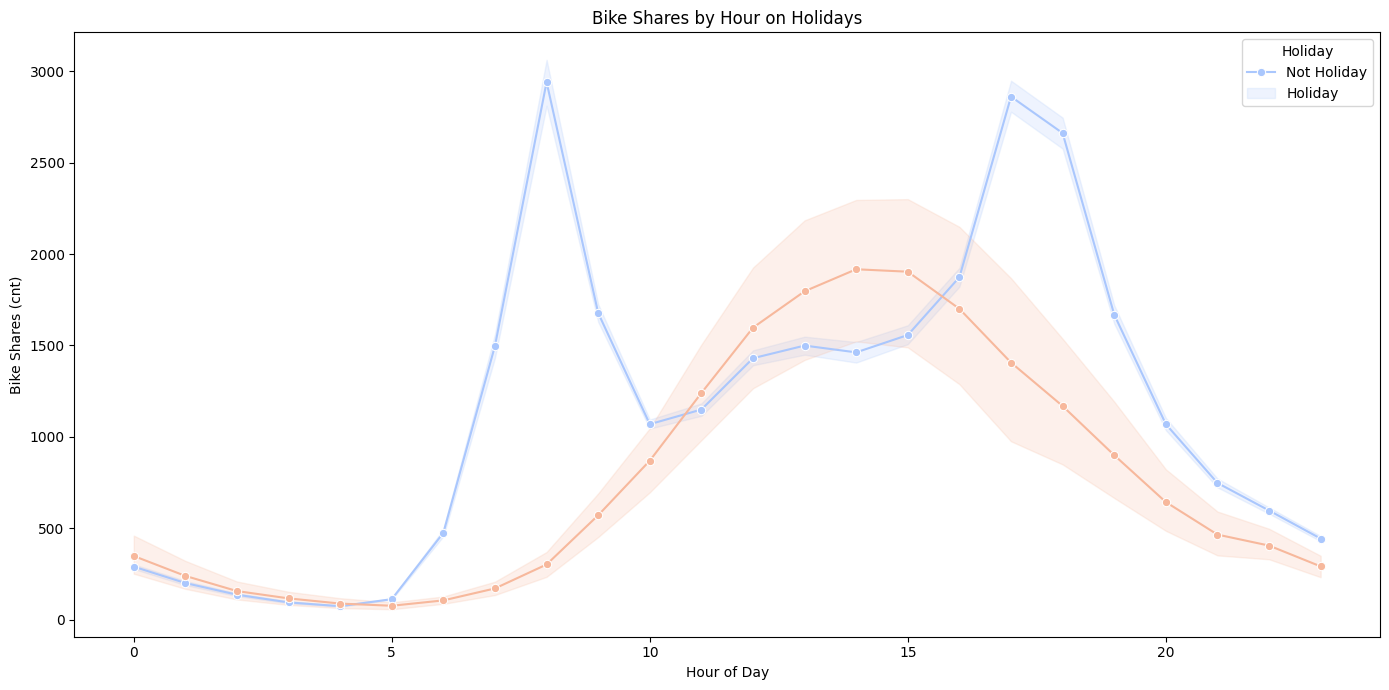

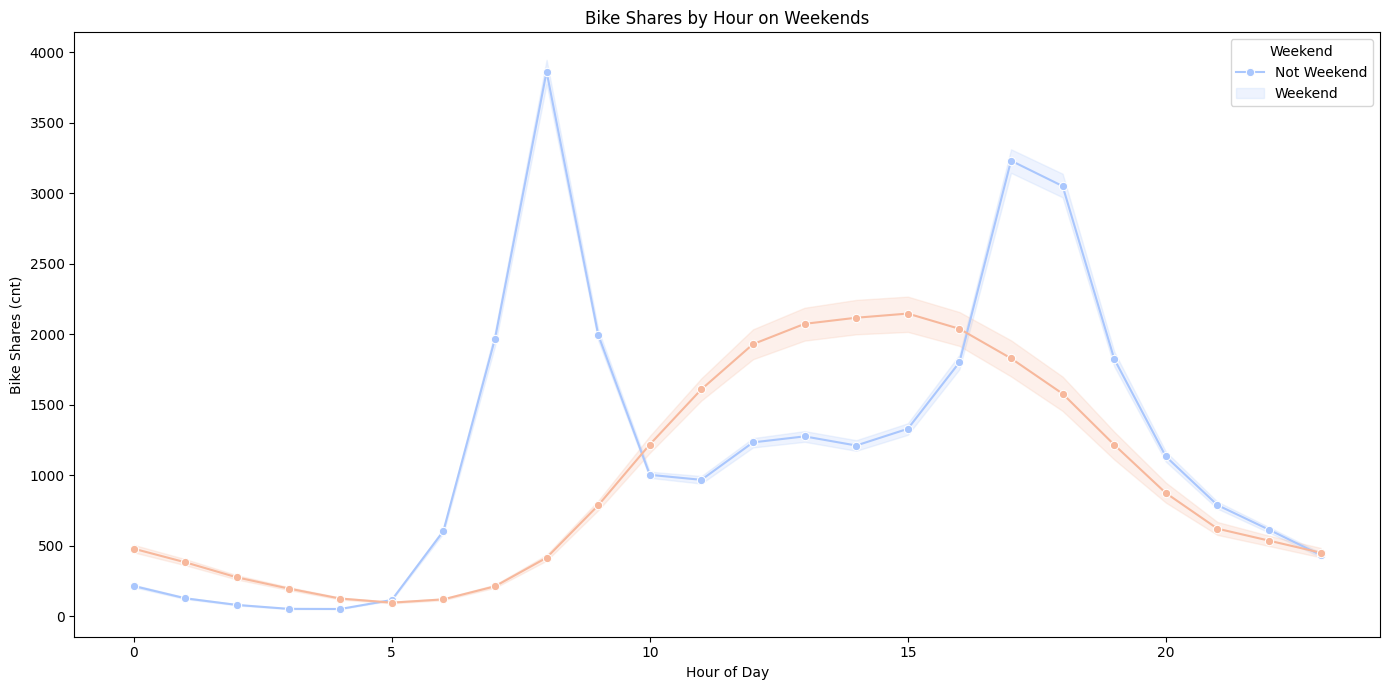

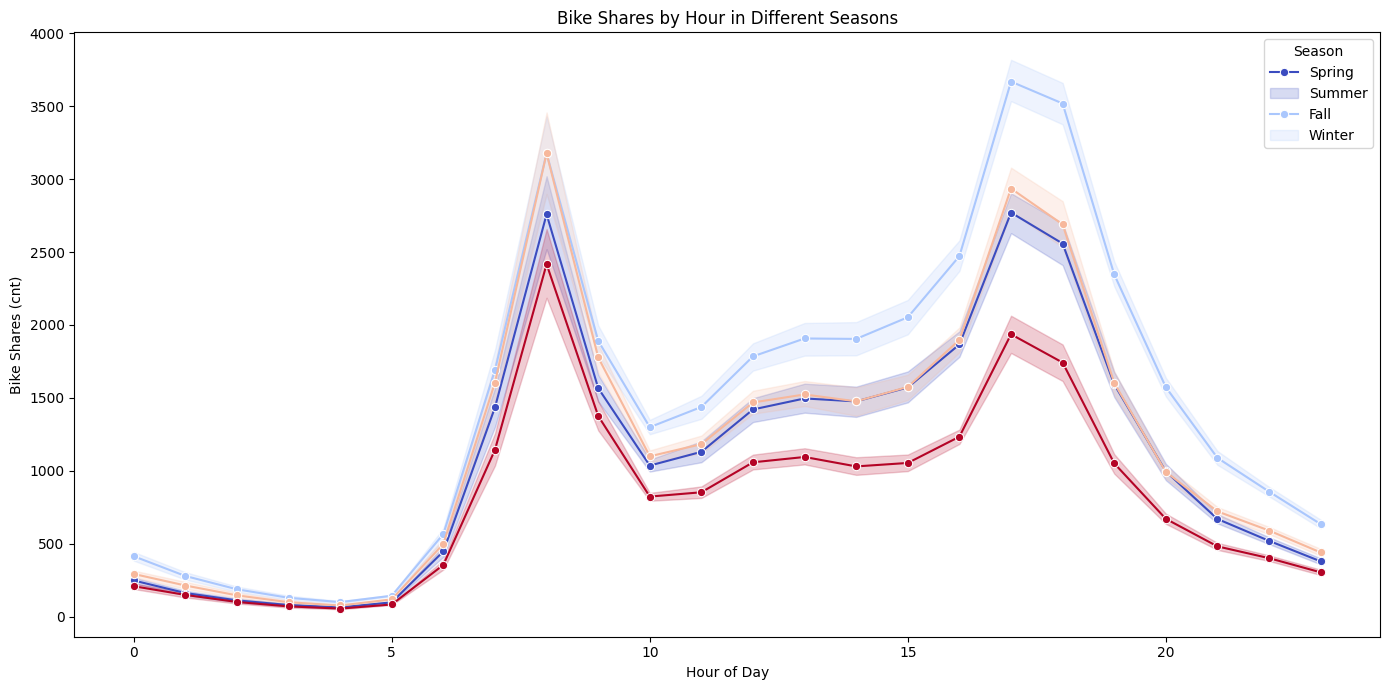

In [ ]:
# Plot bike shares by hours on Holidays
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['hour'], y=data['cnt'], hue=data['is_holiday'], palette="coolwarm", marker='o')
plt.title("Bike Shares by Hour on Holidays")
plt.xlabel("Hour of Day")
plt.ylabel("Bike Shares (cnt)")
plt.legend(title="Holiday", labels=["Not Holiday", "Holiday"])
plt.tight_layout()
plt.show()

# Plot bike shares by hours on Weekends
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['hour'], y=data['cnt'], hue=data['is_weekend'], palette="coolwarm", marker='o')
plt.title("Bike Shares by Hour on Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Bike Shares (cnt)")
plt.legend(title="Weekend", labels=["Not Weekend", "Weekend"])
plt.tight_layout()
plt.show()

# Plot bike shares by hours on Seasons
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['hour'], y=data['cnt'], hue=data['season'], palette="coolwarm", marker='o')
plt.title("Bike Shares by Hour in Different Seasons")
plt.xlabel("Hour of Day")
plt.ylabel("Bike Shares (cnt)")
plt.legend(title="Season", labels=["Spring", "Summer", "Fall", "Winter"])
plt.tight_layout()
plt.show()


# **TASK 11 - PLOTTING BIKE SHARES BY DAY OF WEEK**

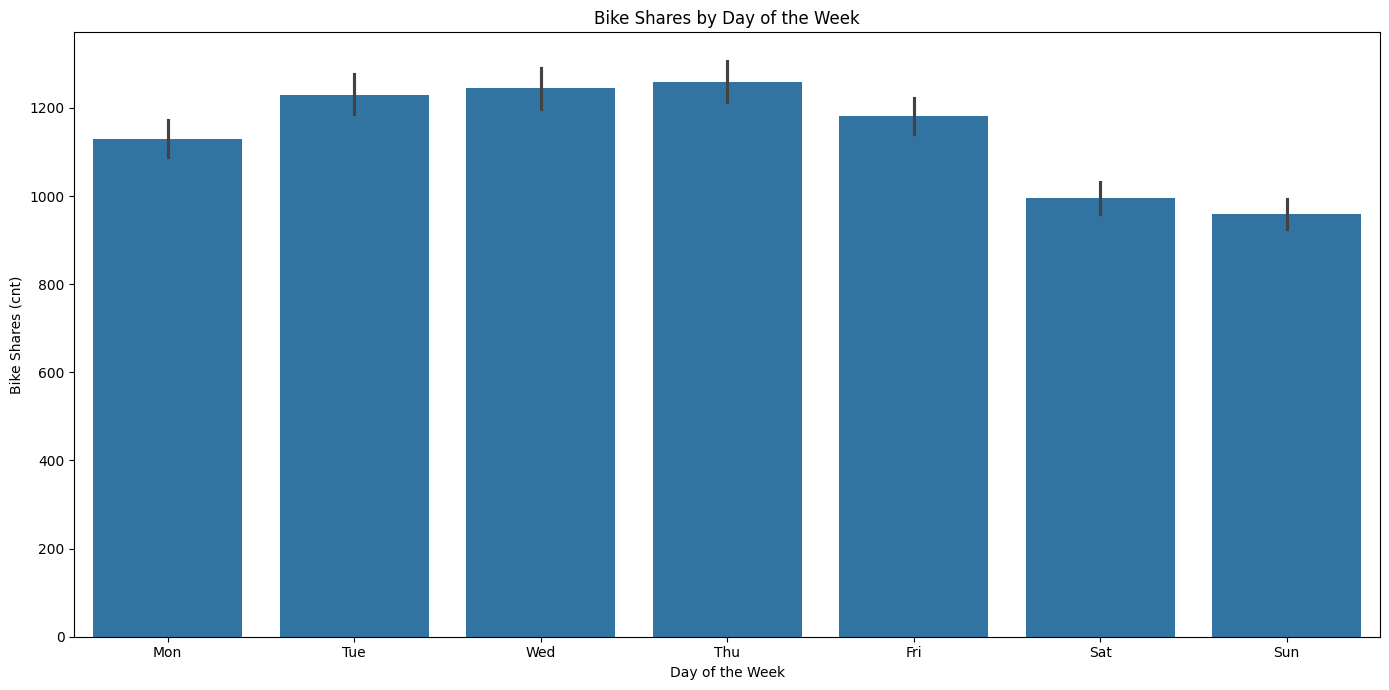

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bike shares by day of the week
plt.figure(figsize=(10, 7))
sns.barplot(x=data['day_of_week'], y=data['cnt'], color="tab:blue")
plt.title("Bike Shares by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Bike Shares (cnt)")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.tight_layout()
plt.show()


# **TASK 12 - PLOTTING BIKE SHARES BY DAY OF MONTH**

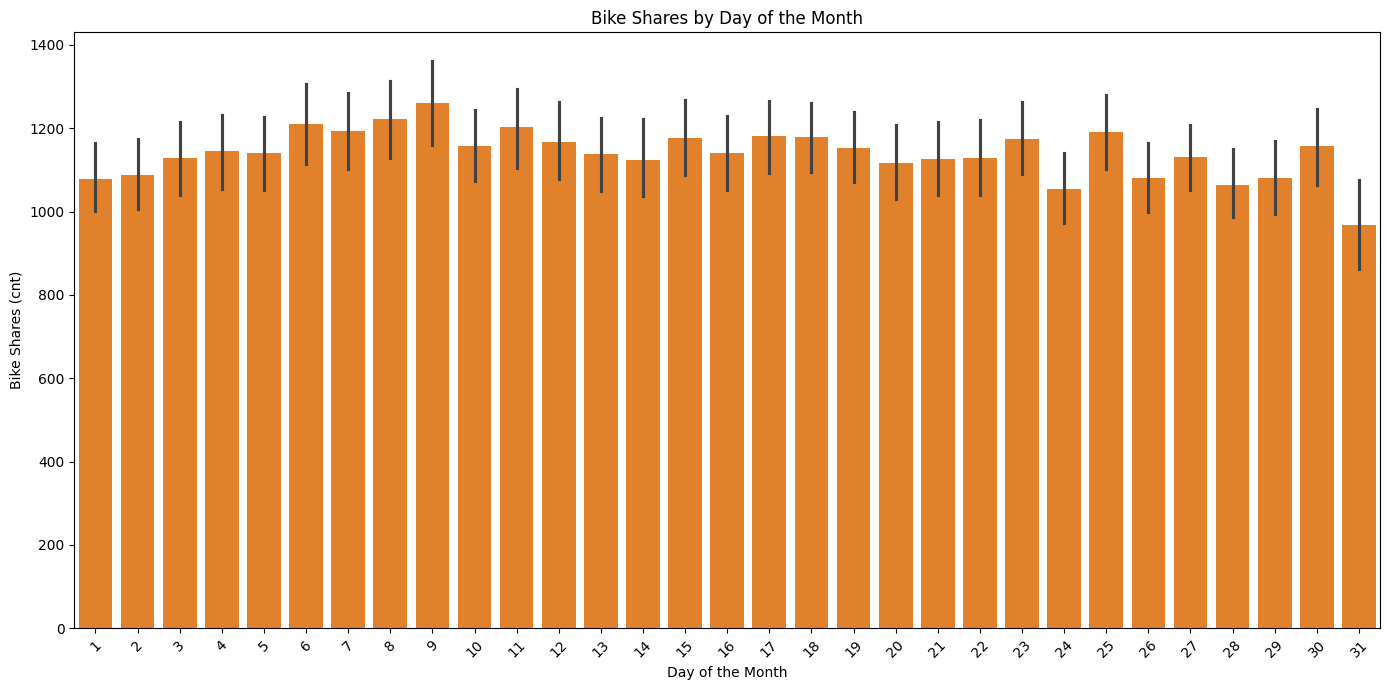

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bike shares by day of the month
plt.figure(figsize=(14, 7))
sns.barplot(x=data['day_of_month'], y=data['cnt'], color="tab:orange")
plt.title("Bike Shares by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Bike Shares (cnt)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# **TASK 13 - PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON**

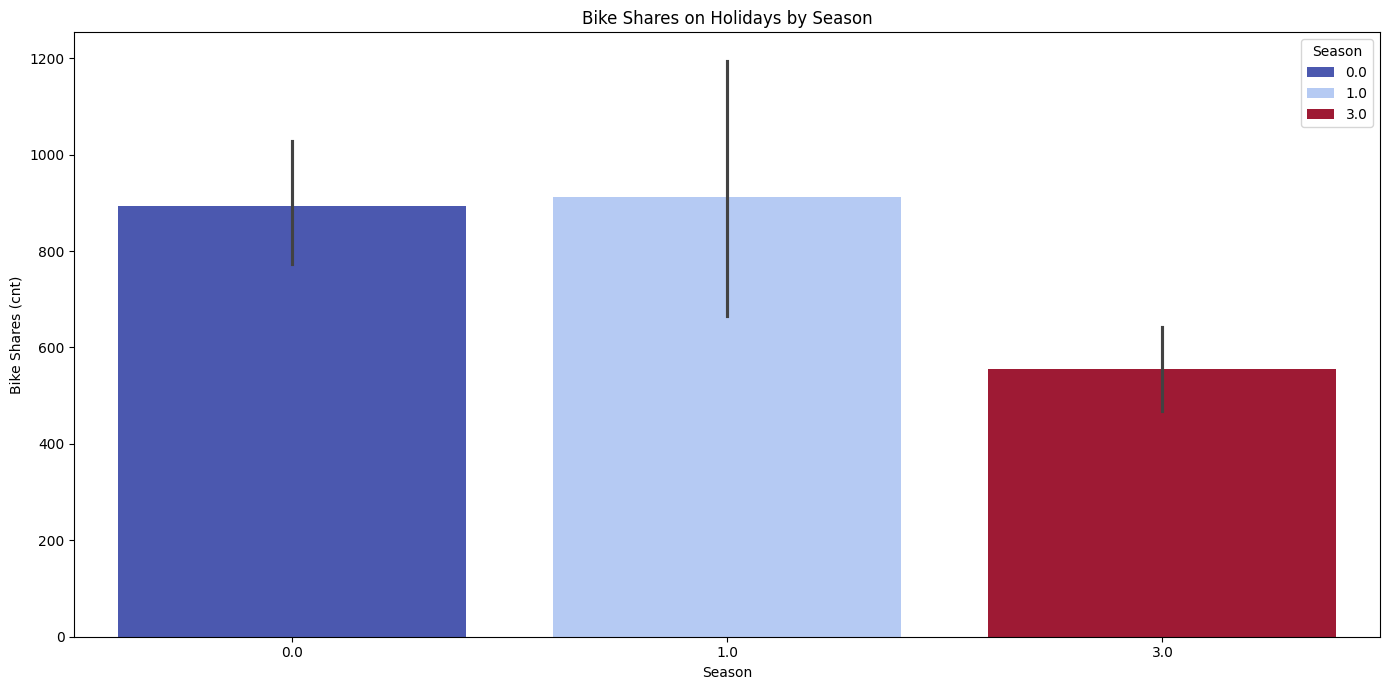

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for holidays
holiday_data = data[data['is_holiday'] == 1]

# Plot bike shares on holidays by season using a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=holiday_data['season'], y=holiday_data['cnt'], hue=holiday_data['season'], palette="coolwarm")
plt.title("Bike Shares on Holidays by Season")
plt.xlabel("Season")
plt.ylabel("Bike Shares (cnt)")
plt.legend(title="Season")
plt.tight_layout()
plt.show()

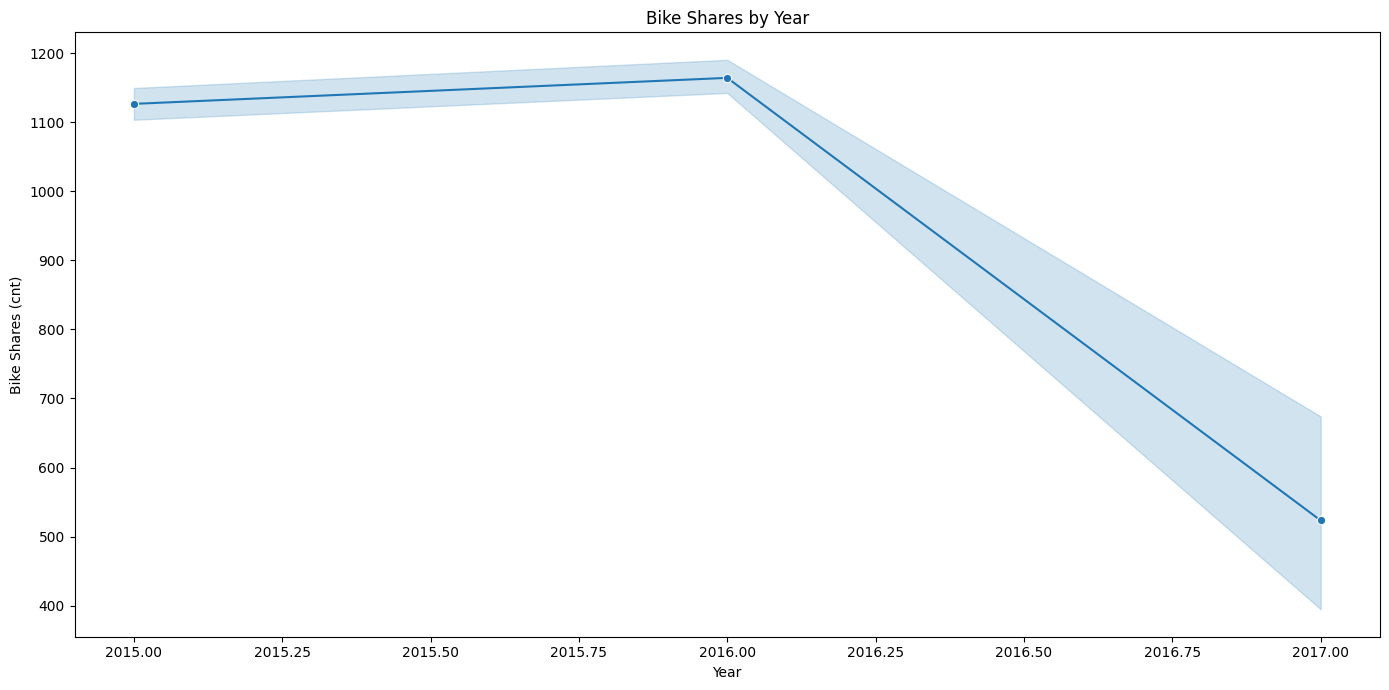

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from timestamp for plotting
data['year'] = data.index.year

# Plot bike shares by year using a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['year'], y=data['cnt'], marker='o', color="tab:blue")
plt.title("Bike Shares by Year")
plt.xlabel("Year")
plt.ylabel("Bike Shares (cnt)")
plt.tight_layout()
plt.show()


# **TASK 14 - VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT**

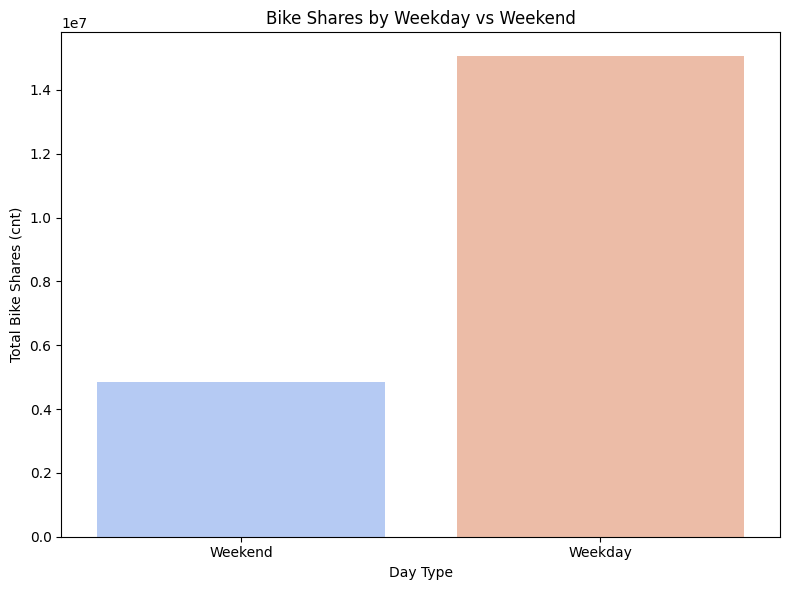

In [ ]:
# Prepare data for plotting
weekend_shares = weekend_data['cnt'].sum()
weekday_shares = weekday_data['cnt'].sum()

# Create a DataFrame for the barplot
shares_df = pd.DataFrame({
    'Day Type': ['Weekend', 'Weekday'],
    'Bike Shares': [weekend_shares, weekday_shares]
})

# Plotting bike shares by weekday-weekend using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Day Type', y='Bike Shares', data=shares_df, hue='Day Type', palette="coolwarm")
plt.title("Bike Shares by Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Total Bike Shares (cnt)")
plt.tight_layout()
plt.show()


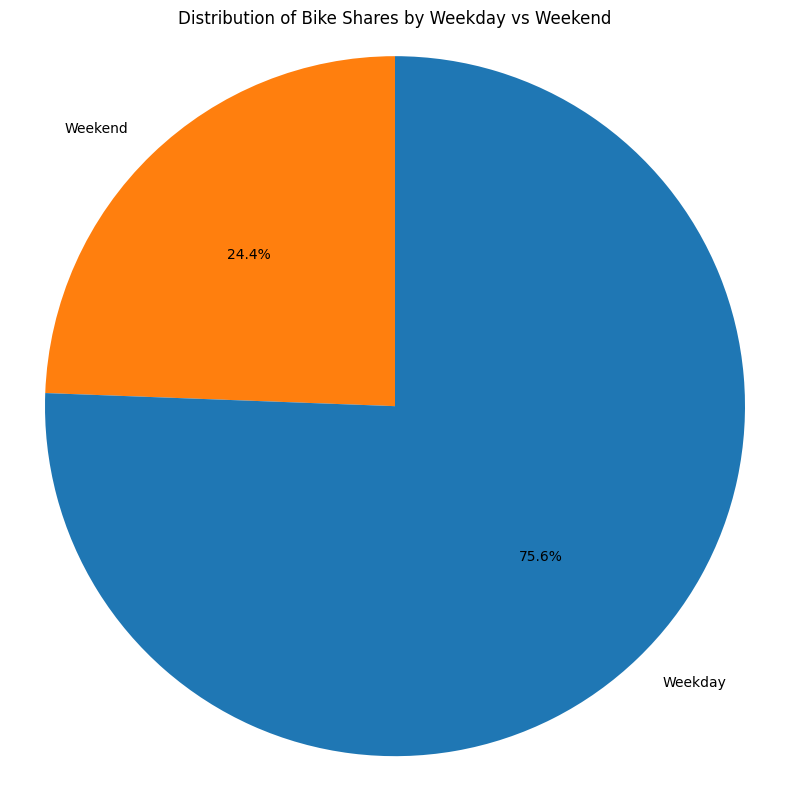

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total bike shares for weekdays and weekends
weekend_data = data[data['is_weekend'] == 1]
weekday_data = data[data['is_weekend'] == 0]

# Pie chart for bike shares distribution by weekday-weekend
bike_shares_by_weekend = [weekend_data['cnt'].sum(), weekday_data['cnt'].sum()]
labels = ['Weekend', 'Weekday']

plt.figure(figsize=(8, 8))
plt.pie(bike_shares_by_weekend, labels=labels, autopct='%1.1f%%', startangle=90, colors=['tab:orange', 'tab:blue'])
plt.title("Distribution of Bike Shares by Weekday vs Weekend")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# **TASK 15 - PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON**

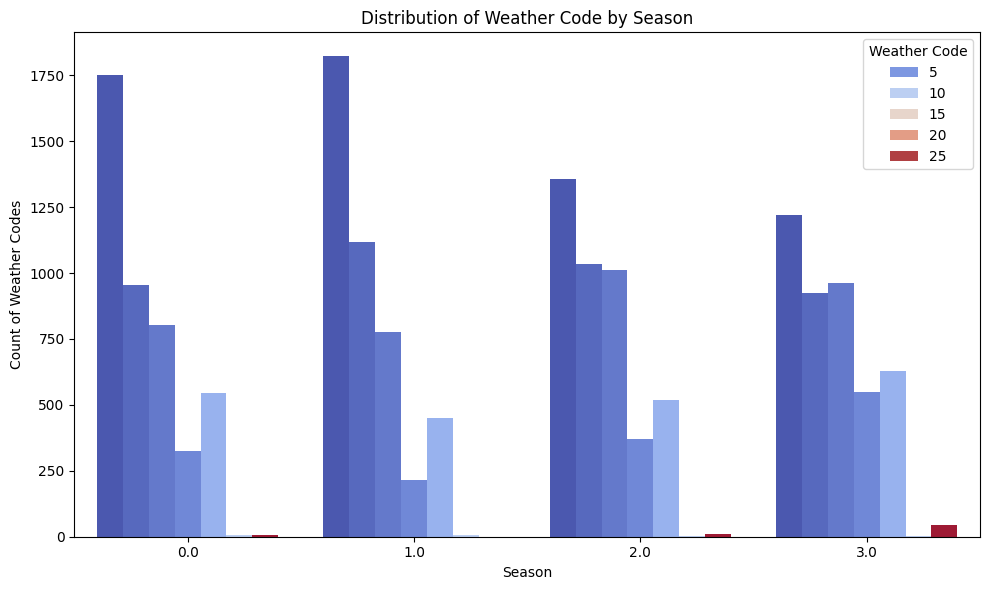

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of weather code by season using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='weather_code', data=data, palette="coolwarm")
plt.title("Distribution of Weather Code by Season")
plt.xlabel("Season")
plt.ylabel("Count of Weather Codes")
plt.legend(title="Weather Code")
plt.tight_layout()
plt.show()
